# Домашнее задание

## Практическая часть

### Задание 1 (RandomForest vs DecisionTree)
Поработайте с датасетом wine_data (в каждой строке этого датасета содержится информация о бутылках вина одного из трёх видов: в первой колонке - вид вина (1, 2 или 3), в колонках 1-13 - свойства вина). 

1) Посчитайте качество DecisionTreeClassifier и RandomForestClassifier на кросс-валидации.

2*) Попробуйте уменьшить число признаков с помощью какого-либо метода отбора признаков (http://scikit-learn.org/stable/modules/feature_selection.html). Добейтесь увеличения качества RandomForestClassifier на кросс-валидации.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('wine_data.csv', header=None)
print(data.shape)
data.head()

(178, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
y = data[0].as_matrix()
X = data.drop(0, axis=1).as_matrix()
print(X.shape, y.shape)

(178, 13) (178,)


C:\Users\nepti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\nepti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


#### Decision Tree

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [5]:
from sklearn.model_selection import cross_val_score

In [29]:
scores = cross_val_score(clf, X, y, cv=10, scoring = 'f1_macro')
scores.mean()

0.8854547304547303

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [15]:
X_new = SelectKBest(mutual_info_classif, k=10).fit_transform(X, y)

In [30]:
scores = cross_val_score(clf, X_new, y, cv=10, scoring = 'f1_macro')
scores.mean()

0.8952722332134098

In [33]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=DecisionTreeClassifier(), step=1, cv=15, scoring = 'f1_macro')
#rfecv.fit(X_train, y_train)
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
#print('Selected features: %s' % (X_train[:,rfecv.support_]))
X_new = X[:,rfecv.support_]

Optimal number of features: 4


C:\Users\nepti\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
scores = cross_val_score(clf, X_new, y, cv=10, scoring = 'f1_macro')
scores.mean()

0.9107141932141932

In [37]:
from sklearn.model_selection import GridSearchCV

In [41]:
params = {
    'criterion':['gini', 'entropy'],
    'max_depth':range(3,10,2)
}
gsearch_DT = GridSearchCV(DecisionTreeClassifier(), 
                       param_grid = params, cv=5, scoring = 'f1_macro')
gsearch_DT.fit(X,y)
gsearch_DT.best_params_, gsearch_DT.best_score_ # score по умолчанию accuracy?

({'criterion': 'entropy', 'max_depth': 9}, 0.917293286714478)

#### RandomForest

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

C:\Users\nepti\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [43]:
scores = cross_val_score(clf, X, y, cv=10, scoring = 'f1_macro')
scores.mean()

0.9605733155733155

In [48]:
rfecv = RFECV(estimator=RandomForestClassifier(), step=1, cv=15, scoring = 'f1_macro')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
X_new = X[:,rfecv.support_]

C:\Users\nepti\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Optimal number of features: 7


In [49]:
scores = cross_val_score(clf, X_new, y, cv=10, scoring = 'f1_macro')
scores.mean()

0.9739860139860139

In [50]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [51]:
params = {
    'criterion':['gini', 'entropy'],
    'max_depth':range(3,15,2),
    'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100]
}
gsearch_RF = GridSearchCV(RandomForestClassifier(), 
                       param_grid = params, cv=5, scoring = 'f1_macro')

In [52]:
gsearch_RF.fit(X,y)
gsearch_RF.best_params_, gsearch_RF.best_score_

({'criterion': 'entropy', 'max_depth': 13, 'n_estimators': 32},
 0.9840138014295318)

### Задание 2 (LinearRegression vs Tree-based algorithms)
Примените к BostonDataset линейную регрессию. Сравните ее качество на кросс-валидации с качеством DecisionTreeRegressor и RandomForestRegressor (см. заполненный ноутбук DT_RF_filled).
Какой алгоритм работает лучше?

#### LinearRegression

In [53]:
from sklearn.datasets import load_boston

data = load_boston()
X = data.data
y = data.target

In [54]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [55]:
print(-cross_val_score(clf, X, y, cv=5,
                       scoring='neg_mean_squared_error').mean(),
     cross_val_score(clf, X, y, cv=5, 
                       scoring='r2').mean())

37.2228436371383 0.3507413509325238


In [56]:
import matplotlib.pyplot as plt

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

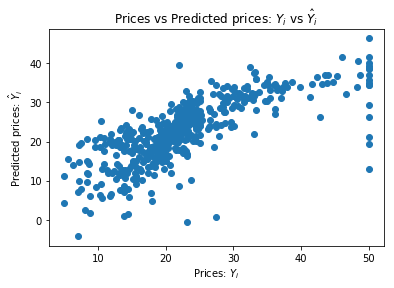

In [57]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(clf, X, y, cv=5) # корректно ли так делать?

plt.scatter(y, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

#### LinearRegression with regularization

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#clf.fit(X_train, y_train)
#feature_importances = list(sorted(zip(X.columns, clf.steps[1][1].coef_.squeeze()), key=lambda x: -abs(x[1]))) # объедим названия признаков и их важность в один список методом zip, отсортируем в порядке возрастания коэффициентов
#pd.DataFrame(feature_importances, columns=['feature_name', 'feature_importance'])[:10]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

C:\Users\nepti\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [61]:
# Ridge
clf = Pipeline([('scaler', StandardScaler()),
                ('regressor', Ridge())])
grid_params = {
    'regressor__alpha': [0.1, 1, 1.5, 2.0, 10.0, 100.0],
}
gsearch_Rige = GridSearchCV(clf, grid_params, cv=5,verbose=0,scoring='r2')

gsearch_Rige.fit(X_train, y_train)
y_pred = gsearch_Rige.best_estimator_.predict(X_test)
print('R2 for best RidgeRegression (train): %.5f' % gsearch_Rige.best_score_, gsearch_Rige.best_params_)
print('R2 for best RidgeRegression (test): %.5f' % r2_score(y_pred, y_test))

#print(gsearch_Rige.best_score_, gsearch_Rige.best_params_)



R2 for best RidgeRegression (train): 0.68493 {'regressor__alpha': 10.0}
R2 for best RidgeRegression (test): 0.67798


In [64]:
# Lasso
clf = Pipeline([('scaler', StandardScaler()),
                ('regressor', Lasso())])
grid_params = {
    'regressor__alpha': [0.1, 1, 1.5, 2.0, 10.0, 100.0], 
}
gsearch_Lasso = GridSearchCV(clf, grid_params, cv=5,verbose=0,scoring='r2')
gsearch_Lasso.fit(X_train, y_train)
y_pred = gsearch_Lasso.best_estimator_.predict(X_test)
print('R2 for best LassoRegression (train): %.5f' % gsearch_Lasso.best_score_, gsearch_Lasso.best_params_)
print('R2 for best LassoRegression (test): %.5f' % r2_score(y_pred, y_test))


R2 for best LassoRegression (train): 0.67925 {'regressor__alpha': 0.1}
R2 for best LassoRegression (test): 0.66105


In [65]:
# ElasticNet
clf = Pipeline([('scaler', StandardScaler()),
                ('regressor', ElasticNet())])
grid_params = {
    'regressor__alpha': [0.1, 1, 1.5, 2.0, 10.0, 100.0], # насколько большая будет регуляризация
    'regressor__l1_ratio': [0.1, 0.1, 0.5, 0.8, 1.0] # какая доля L1 регуляризации по отношению к общей
}
gsearch_EN = GridSearchCV(clf, grid_params, cv=5,verbose=0,scoring='r2')
gsearch_EN.fit(X_train, y_train)
y_pred = gsearch_EN.best_estimator_.predict(X_test)
print('R2 for best ElasticNet (train): %.5f' % gsearch_EN.best_score_, gsearch_EN.best_params_)
print('R2 for best ElasticNet (test): %.5f' % r2_score(y_pred, y_test))


R2 for best ElasticNet (train): 0.68111 {'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.1}
R2 for best ElasticNet (test): 0.63914


#### DecisionTreeRegressor

In [66]:
#from sklearn.model_selection import KFold
#cv = KFold(X.shape[0], shuffle=True, random_state=241) # leave one out?
#cv=cv

from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state=42) 
print(-cross_val_score(clf, X, y, cv=5,
                       scoring='neg_mean_squared_error').mean(),
      cross_val_score(clf, X, y, cv=5, 
                       scoring='r2').mean())

45.34385633857504 0.03533846338104087


In [67]:
clf.get_params()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}

In [68]:
import numpy as np

In [69]:
gsearch_DT = GridSearchCV(DecisionTreeRegressor(random_state=42),
                  param_grid={'max_features': [None, 'log2', 'sqrt'], 
                              'max_depth': [2, 4, 6, 8, 10, 20, 50],
                             'min_samples_leaf': np.arange(1,20,1)},
                  cv=5,
                  scoring='r2')
gsearch_DT.fit(X_train, y_train)
y_pred = gsearch_DT.best_estimator_.predict(X_test)
print('R2 for best DecisionTreeRegressor (train): %.5f' % gsearch_DT.best_score_, gsearch_DT.best_params_)
print('R2 for best DecisionTreeRegressor (test): %.5f' % r2_score(y_pred, y_test))

R2 for best DecisionTreeRegressor (train): 0.74943 {'max_depth': 6, 'max_features': None, 'min_samples_leaf': 2}
R2 for best DecisionTreeRegressor (test): 0.81145


#### RandomForestRegressor

In [70]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(random_state=42) 
print(-cross_val_score(clf, X, y, cv=5,
                       scoring='neg_mean_squared_error').mean(),
      cross_val_score(clf, X, y, cv=5, 
                       scoring='r2').mean())

25.231575814404966 0.5359833237312592


In [71]:
clf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [72]:
gsearch_DT = GridSearchCV(RandomForestRegressor(random_state=42),
                  param_grid={'max_features': [None, 'log2', 'sqrt'], 
                              'max_depth': [2, 4, 6, 8, 10, 20, 50],
                             'min_samples_leaf': np.arange(1,20,1),
                             'n_estimators': np.arange(5,120,20)},
                  cv=5,
                  scoring='r2')
gsearch_DT.fit(X_train, y_train)
y_pred = gsearch_DT.best_estimator_.predict(X_test)
print('R2 for best DecisionTreeRegressor (train): %.5f' % gsearch_DT.best_score_, gsearch_DT.best_params_)
print('R2 for best DecisionTreeRegressor (test): %.5f' % r2_score(y_pred, y_test))

R2 for best DecisionTreeRegressor (train): 0.84016 {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 65}
R2 for best DecisionTreeRegressor (test): 0.80075


In [30]:
# RandomForestRegressor лучше всего, но немного переобучился

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:08<00:00,  1.45s/it]


([<matplotlib.axis.XTick at 0x23ac0a09208>,
 <a list of 6 Text xticklabel objects>)

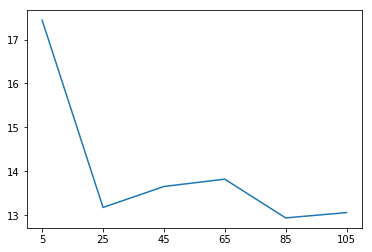

In [75]:
from tqdm import tqdm
import pylab as plt

Ntrees = np.arange(5,120,20)
#Ntrees = [10, 100, 500, 1000]
Scores = []

for elem in tqdm(Ntrees):
    regr = RandomForestRegressor(n_estimators=elem, n_jobs=-1)
    Scores.append(-cross_val_score(regr, X_train, y_train, cv=5,
                       scoring='neg_mean_squared_error').mean())
    
plt.plot(Scores)
plt.xticks(np.arange(len(Ntrees)), Ntrees)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:08<00:00,  1.46s/it]


([<matplotlib.axis.XTick at 0x23ac0a6ecc0>,
 <a list of 6 Text xticklabel objects>)

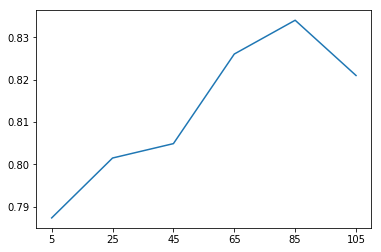

In [76]:
Ntrees = np.arange(5,120,20)
Scores = []

for elem in tqdm(Ntrees):
    regr = RandomForestRegressor(n_estimators=elem, n_jobs=-1)
    Scores.append(cross_val_score(regr, X_train, y_train, cv=5,
                       scoring='r2').mean())
    
plt.plot(Scores)
plt.xticks(np.arange(len(Ntrees)), Ntrees)

### Задание 3 (Boosting vs Bagging)

Поработайте с датасетом Diabetes. Ваша задача - получить как можно более высокое качество на кросс-валидации.

Вы можете использовать любые известные вам алгоритмы и методы обработки данных, но обязательно попробуйте DecisionTreeRegressor, RandomForestRegressor и GradientBoostingRegressor. Не забудьте подобрать параметры у алгоритмов.

Для RandomForestRegressor и GradientBoostingRegressor с оптимальными параметрами постройте график зависимости качества алгоритмов от количества деревьев.

In [77]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

X_full = data.data
y_full = data.target

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, train_size=0.5, random_state=42)

C:\Users\nepti\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### DecisionTreeRegressor

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

clf = DecisionTreeRegressor(random_state=42) 
print(-cross_val_score(clf, X_train, y_train, cv=5,
                       scoring='neg_mean_squared_error').mean(),
      cross_val_score(clf, X_train, y_train, cv=5, 
                       scoring='r2').mean())

6363.7451515151515 -0.08065529351847803


In [ ]:
#y_pred = clf.predict(X_test)
#r2_score(y_pred, y_test)

In [80]:
gsearch_DT = GridSearchCV(DecisionTreeRegressor(random_state=42),
                  param_grid={'max_features': [None, 'log2', 'sqrt'], 
                              'max_depth': [2, 4, 6, 8, 10, 20, 50],
                             'min_samples_leaf': np.arange(1,20,1)},
                  cv=5,
                  scoring='r2')
gsearch_DT.fit(X_train, y_train)
y_pred = gsearch_DT.best_estimator_.predict(X_test)
print('R2 for best DecisionTreeRegressor (train): %.5f' % gsearch_DT.best_score_, gsearch_DT.best_params_)
print('R2 for best DecisionTreeRegressor (test): %.5f' % r2_score(y_pred, y_test))

R2 for best DecisionTreeRegressor (train): 0.34519 {'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1}
R2 for best DecisionTreeRegressor (test): -0.78492


In [81]:
from sklearn.metrics import mean_squared_error

In [83]:
gsearch_DT = GridSearchCV(DecisionTreeRegressor(random_state=42),
                  param_grid={'max_features': [None, 'log2', 'sqrt'], 
                              'max_depth': [2, 4, 6, 8, 10, 20, 50],
                             'min_samples_leaf': np.arange(1,20,1)},
                  cv=5,
                  scoring='neg_mean_squared_error')
gsearch_DT.fit(X_train, y_train)
y_pred = gsearch_DT.best_estimator_.predict(X_test)
print('mean_squared_error for best DecisionTreeRegressor (train): %.5f' % -gsearch_DT.best_score_, gsearch_DT.best_params_)
print('mean_squared_error for best DecisionTreeRegressor (test): %.5f' % mean_squared_error(y_pred, y_test))

mean_squared_error for best DecisionTreeRegressor (train): 3888.57182 {'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1}
mean_squared_error for best DecisionTreeRegressor (test): 4401.67431


#### RandomForestRegressor

In [84]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(random_state=42) 
print(-cross_val_score(clf, X_train, y_train, cv=5,
                       scoring='neg_mean_squared_error').mean(),
      cross_val_score(clf, X_train, y_train, cv=5, 
                       scoring='r2').mean())

4096.2546262626265 0.30028533915479416


In [85]:
gsearch_DT = GridSearchCV(RandomForestRegressor(random_state=42),
                  param_grid={'max_features': [None, 'log2', 'sqrt'], 
                              'max_depth': [2, 4, 6, 8, 10, 20, 50],
                             'min_samples_leaf': np.arange(1,20,1)},
                  cv=5,
                  scoring='r2')
gsearch_DT.fit(X_train, y_train)
y_pred = gsearch_DT.best_estimator_.predict(X_test)
print('R2 for best DecisionTreeRegressor (train): %.5f' % gsearch_DT.best_score_, gsearch_DT.best_params_)
print('R2 for best DecisionTreeRegressor (test): %.5f' % r2_score(y_pred, y_test))

R2 for best DecisionTreeRegressor (train): 0.41004 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1}
R2 for best DecisionTreeRegressor (test): -0.52653


In [89]:
MAX_ESTIMATORS = 250
rfreg = RandomForestRegressor(max_depth = 4, max_features = 'log2', min_samples_leaf = 1)
err_train_rf = []
err_test_rf = []
for i in range(1, MAX_ESTIMATORS+1):
    rfreg.n_estimators = i
    rfreg.fit(X_train, y_train)
    err_train_rf.append(1 - rfreg.score(X_train, y_train))
    err_test_rf.append(1 - rfreg.score(X_test, y_test))

#### GradientBoostingRegressor

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

In [96]:
gsearch_DT = GridSearchCV(GradientBoostingRegressor(random_state=42),
                  param_grid={'max_features': [None, 'log2', 'sqrt'], 
                              'max_depth': [2, 4, 6, 8, 10, 20, 50],
                             'min_samples_leaf': np.arange(1,20,1),
                             'learning_rate': [1, 0.5, 0.3, 0.2, 0.1]},
                  cv=5,
                  scoring='r2')
gsearch_DT.fit(X_train, y_train)
y_pred = gsearch_DT.best_estimator_.predict(X_test)
print('R2 for best DecisionTreeRegressor (train): %.5f' % gsearch_DT.best_score_, gsearch_DT.best_params_)
print('R2 for best DecisionTreeRegressor (test): %.5f' % r2_score(y_pred, y_test))

R2 for best DecisionTreeRegressor (train): 0.44902 {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 7}
R2 for best DecisionTreeRegressor (test): -0.15636


In [97]:
MAX_ESTIMATORS = 250

gbreg = GradientBoostingRegressor(warm_start=True, learning_rate = 0.1, max_depth = 2, 
                                  max_features = 'log2', min_samples_leaf = 7)
err_train_gb = []
err_test_gb = []
for i in range(1, MAX_ESTIMATORS+1):
    gbreg.n_estimators = i
    gbreg.fit(X_train, y_train)
    err_train_gb.append(1 - gbreg.score(X_train, y_train))
    err_test_gb.append(1 - gbreg.score(X_test, y_test))

Text(0.5,1,'Test')

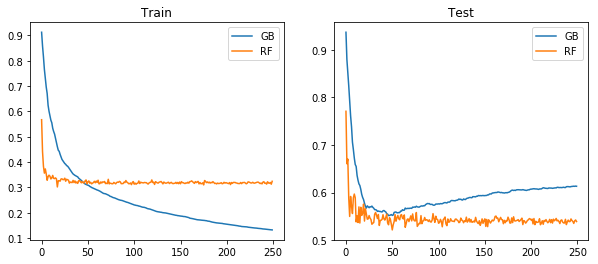

In [98]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(err_train_gb, label='GB')
plt.plot(err_train_rf, label='RF')
plt.legend()
plt.title('Train')
plt.subplot(1, 2, 2)
plt.plot(err_test_gb, label='GB')
plt.plot(err_test_rf, label='RF')
plt.legend()
plt.title('Test')

In [ ]:
# бустинг переобучается и на тесте ведет себя хуже, случайный лес в данном случае сработал лучше